In [1]:
import torch
from torchvision import datasets, transforms

# Define the transform to convert images to tensors
transform = transforms.Compose([
    transforms.ToTensor()
])

# Downlaod CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

train_dataset, test_dataset

Files already downloaded and verified
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [2]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

In [3]:
from torch.utils.data import DataLoader
train_dataLoader = DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_dataLoader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [4]:
for X, y in train_dataLoader:
    print(X.shape)
    print(y)
    break

torch.Size([1000, 3, 32, 32])
tensor([9, 8, 7, 4, 5, 2, 2, 8, 8, 9, 9, 2, 6, 2, 2, 0, 9, 3, 5, 0, 8, 3, 6, 7,
        1, 8, 2, 8, 0, 2, 6, 1, 3, 5, 3, 7, 7, 1, 8, 7, 6, 7, 9, 8, 5, 0, 4, 5,
        5, 5, 8, 6, 9, 3, 6, 6, 7, 2, 4, 0, 6, 7, 3, 8, 9, 4, 0, 7, 6, 9, 4, 4,
        6, 7, 2, 6, 1, 1, 8, 5, 8, 2, 5, 1, 1, 1, 6, 2, 6, 3, 7, 4, 6, 6, 9, 8,
        5, 2, 0, 0, 8, 1, 3, 0, 5, 1, 9, 7, 0, 2, 5, 0, 0, 1, 8, 5, 6, 9, 7, 3,
        9, 4, 2, 5, 2, 3, 5, 2, 4, 2, 4, 5, 2, 2, 7, 9, 0, 4, 3, 2, 3, 1, 1, 6,
        9, 5, 4, 9, 0, 2, 3, 2, 7, 7, 6, 0, 6, 2, 8, 1, 0, 5, 1, 3, 4, 3, 0, 0,
        4, 0, 6, 8, 7, 5, 0, 5, 5, 9, 4, 2, 2, 5, 1, 5, 6, 2, 0, 1, 2, 3, 4, 3,
        8, 2, 8, 6, 4, 9, 9, 8, 7, 2, 8, 0, 3, 4, 4, 3, 2, 7, 6, 7, 1, 1, 3, 6,
        9, 8, 7, 0, 0, 8, 7, 7, 0, 3, 1, 4, 3, 5, 6, 5, 1, 1, 2, 0, 1, 6, 1, 2,
        7, 2, 2, 2, 9, 9, 2, 1, 1, 6, 7, 7, 1, 4, 5, 7, 6, 4, 9, 3, 2, 9, 0, 1,
        1, 3, 9, 9, 7, 2, 8, 6, 5, 2, 3, 3, 9, 3, 2, 5, 7, 2, 0, 8, 3, 1, 6, 5,
        4,

In [5]:
class_names = train_dataset.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
from torch import nn

class Model_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.leakyrelu1 = nn.LeakyReLU()

        self.cnn2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=2, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.leakyrelu2 = nn.LeakyReLU()

        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.leakyrelu3 = nn.LeakyReLU()

        self.cnn4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(64)
        self.leakyrelu4 = nn.LeakyReLU()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=128)
        self.batchnorm5 = nn.BatchNorm1d(128)
        self.leakyrelu5 = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=128, out_features=len(class_names))


    def forward(self, x):
        x = self.cnn1(x)
        x = self.batchnorm1(x)
        x = self.leakyrelu1(x)

        x = self.cnn2(x)
        x = self.batchnorm2(x)
        x = self.leakyrelu2(x)

        x = self.cnn3(x)
        x = self.batchnorm3(x)
        x = self.leakyrelu3(x)

        x = self.cnn4(x)
        x = self.batchnorm4(x)
        x = self.leakyrelu4(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.batchnorm5(x)
        x = self.leakyrelu5(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

torch.manual_seed(42)
model = Model_CNN()
model        


Model_CNN(
  (cnn1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leakyrelu1): LeakyReLU(negative_slope=0.01)
  (cnn2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leakyrelu2): LeakyReLU(negative_slope=0.01)
  (cnn3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leakyrelu3): LeakyReLU(negative_slope=0.01)
  (cnn4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leakyrelu4): LeakyReLU(negative_slope=0.01)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (ba

In [7]:
from torchsummary import summary
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
         LeakyReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 16, 16]           9,248
       BatchNorm2d-5           [-1, 32, 16, 16]              64
         LeakyReLU-6           [-1, 32, 16, 16]               0
            Conv2d-7             [-1, 64, 8, 8]          18,496
       BatchNorm2d-8             [-1, 64, 8, 8]             128
         LeakyReLU-9             [-1, 64, 8, 8]               0
           Conv2d-10             [-1, 64, 8, 8]          36,928
      BatchNorm2d-11             [-1, 64, 8, 8]             128
        LeakyReLU-12             [-1, 64, 8, 8]               0
          Flatten-13                 [-1, 4096]               0
           Linear-14                  [

In [8]:
random_data = torch.randn(size=(2, 3, 32, 32))
model(random_data).shape

# from torch import nn
# print(random_data.shape)
# r = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1)(random_data)
# print(r.shape)
# r = nn.ReLU()(r)
# print(r.shape)
# r = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1)(r)
# print(r.shape)
# r = nn.MaxPool2d(kernel_size=2, stride=2)(r)
# print(r.shape)
# r = nn.Flatten()(r)
# print(r.shape)

torch.Size([2, 10])

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)

In [10]:
def accuracy_fn(y_pred, y_true):
    correct = torch.eq(torch.argmax(y_pred, dim=1), y_true)
    accuracy = correct.sum().item() / len(y_true)
    return accuracy

In [11]:
def train_step(model, train_loader, loss_fn, accuracy_fn, optimizer):
    model.train()
    train_loss, train_acc = 0.0, 0.0
    for X, y in train_loader:
        y_logit = model(X)
        y_pred = torch.softmax(y_logit, dim=1)
        loss = loss_fn(y_logit, y)
        train_acc += accuracy_fn(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_acc /= len(train_loader)

    return train_loss, train_acc

def test_step(model, test_loader, loss_fn, accuracy_fn):
    test_loss, test_acc = 0.0, 0.0
    model.eval()
    with torch.inference_mode():
        for X, y in test_loader:
            y_logit = model(X)
            y_pred = torch.softmax(y_logit, dim = 1)
            test_loss += loss_fn(y_logit, y).item()
            test_acc += accuracy_fn(y_pred, y)

        test_loss /= len(test_loader)
        test_acc /= len(test_loader)

    return test_loss, test_acc
        

In [12]:
epochs = 10
for epoch in range(epochs):
    train_loss, train_acc = train_step(model, train_dataLoader, loss_fn, accuracy_fn, optimizer)
    test_loss, test_acc = test_step(model, test_dataLoader, loss_fn, accuracy_fn)
    print(f"Epoch {epoch} | Train Loss {train_loss:.5f} acc {train_acc:.2f}% | Test Loss {test_loss:.5f} acc {test_acc:.2f}")

Epoch 0 | Train Loss 1.65671 acc 0.42% | Test Loss 1.46049 acc 0.49
Epoch 1 | Train Loss 1.27080 acc 0.56% | Test Loss 1.16206 acc 0.59
Epoch 2 | Train Loss 1.07951 acc 0.63% | Test Loss 1.10937 acc 0.61
Epoch 3 | Train Loss 0.94930 acc 0.67% | Test Loss 0.98702 acc 0.65
Epoch 4 | Train Loss 0.84536 acc 0.71% | Test Loss 0.91865 acc 0.67
Epoch 5 | Train Loss 0.76019 acc 0.74% | Test Loss 0.91418 acc 0.68
Epoch 6 | Train Loss 0.69502 acc 0.76% | Test Loss 0.88595 acc 0.69
Epoch 7 | Train Loss 0.63018 acc 0.79% | Test Loss 0.88890 acc 0.69
Epoch 8 | Train Loss 0.57245 acc 0.81% | Test Loss 0.88227 acc 0.69
Epoch 9 | Train Loss 0.52320 acc 0.82% | Test Loss 0.88189 acc 0.70


In [13]:
import torch

def evaluate_model(model, data_loader, loss_fn, accuracy_fn):
    model.eval()  # Set the model to evaluation mode
    eval_loss = 0.0  # Initialize running loss
    eval_acc = 0.0  # Initialize running accuracy
    num_samples = 0  # Initialize the number of samples

    with torch.inference_mode():  # Disable gradient computation
        for X, y in data_loader:
            y_pred = model(X)  # Forward pass
            loss = loss_fn(y_pred, y)  # Compute the loss
            eval_loss += loss.item() * X.size(0)  # Accumulate the running loss
            eval_acc += accuracy_fn(y_pred, y) * X.size(0)  # Accumulate the running accuracy
            num_samples += X.size(0)  # Accumulate the number of samples

    # Compute the average loss and accuracy for the entire dataset
    avg_loss = eval_loss / num_samples
    avg_acc = eval_acc / num_samples
    
    return avg_loss, avg_acc

In [14]:
# Assuming model, test_loader, loss_fn, and accuracy_fn are already defined
test_loss, test_acc = evaluate_model(model, test_dataLoader, loss_fn, accuracy_fn)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

Test Loss: 0.8819, Test Accuracy: 0.6969


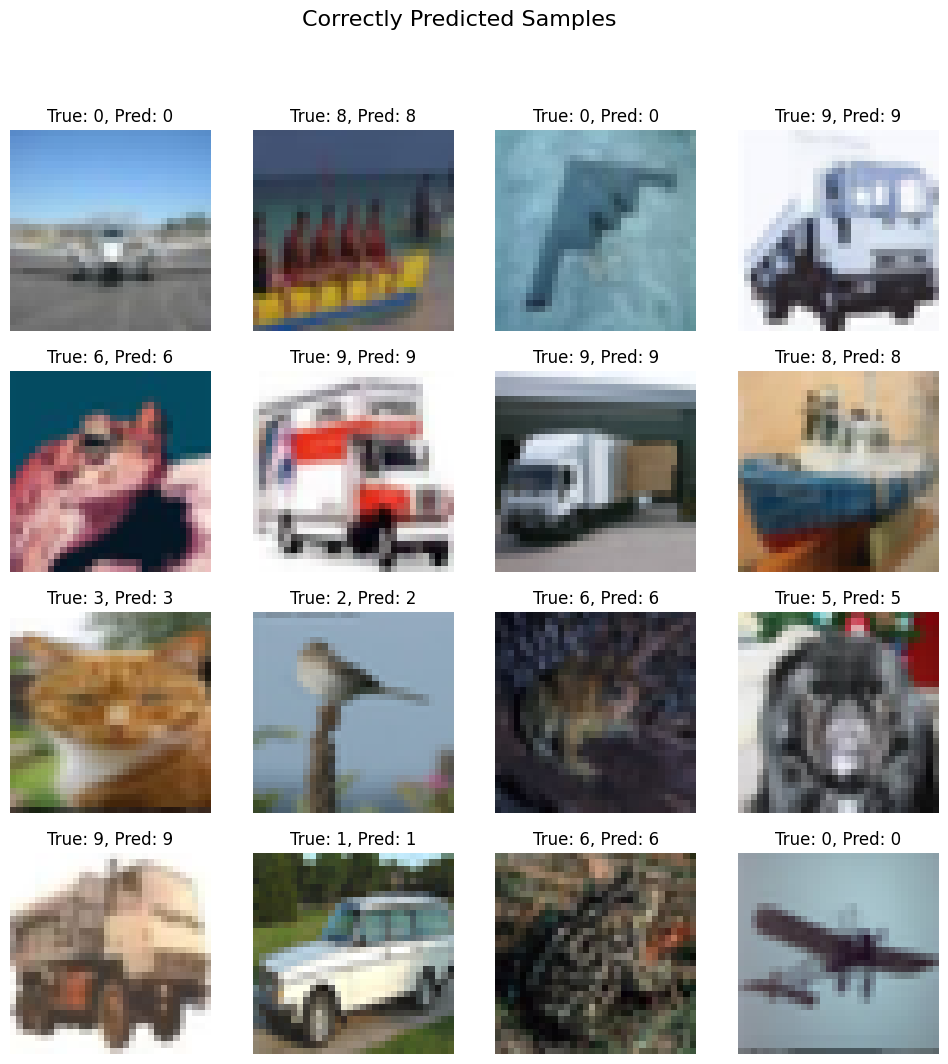

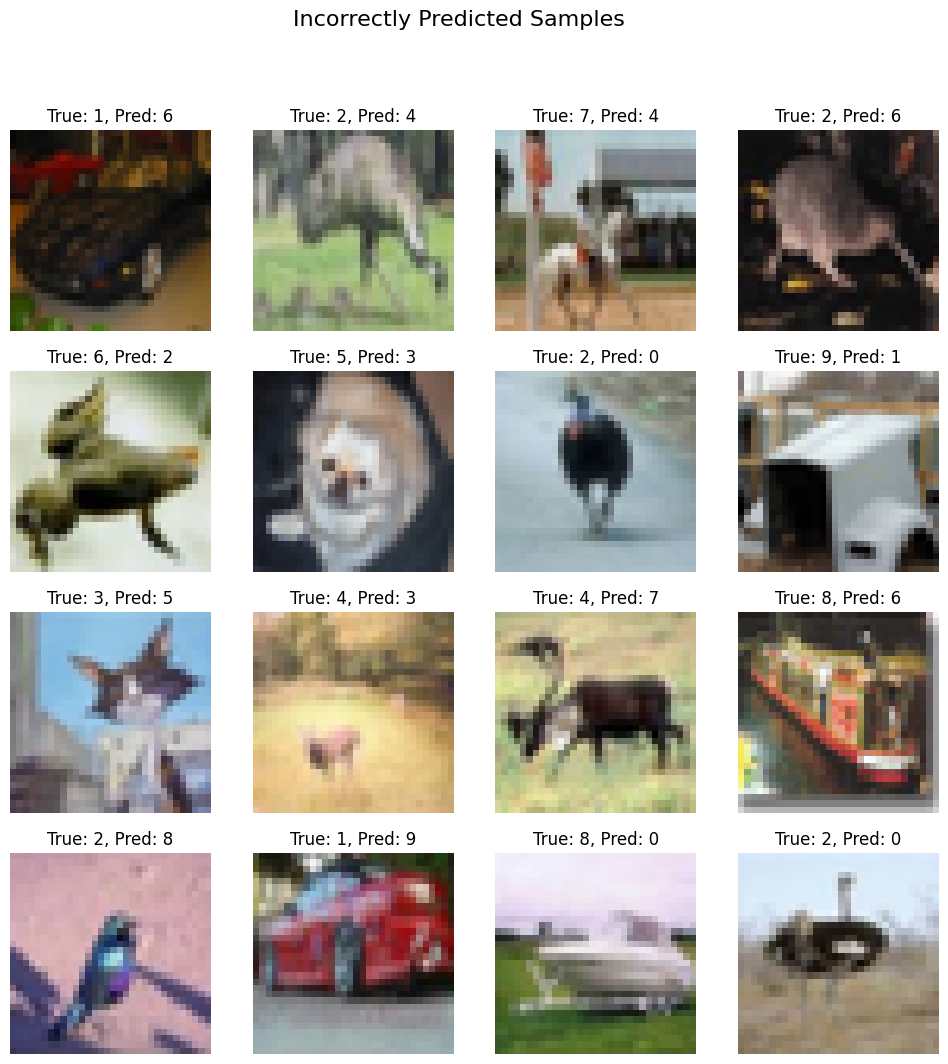

In [15]:
import torch
import matplotlib.pyplot as plt
import random

# Assuming model, test_loader, loss_fn, and accuracy_fn are already defined
model.eval()
correct_samples = []
incorrect_samples = []

# Evaluate the model and collect predictions
with torch.no_grad():
    for X, y in test_dataLoader:
        y_logit = model(X)
        y_pred = torch.argmax(y_logit, dim=1)
        for i in range(len(y)):
            if y_pred[i] == y[i]:
                correct_samples.append((X[i], y[i], y_pred[i]))
            else:
                incorrect_samples.append((X[i], y[i], y_pred[i]))

# Randomly select 16 samples from each category
correct_samples = random.sample(correct_samples, 16)
incorrect_samples = random.sample(incorrect_samples, 16)

# Function to plot samples
def plot_samples(samples, title):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle(title, fontsize=16)
    for i, (img, true_label, pred_label) in enumerate(samples):
        ax = axes[i // 4, i % 4]
        img = img.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        ax.imshow(img.cpu().numpy())
        ax.set_title(f'True: {true_label}, Pred: {pred_label}')
        ax.axis('off')
    plt.show()

# Plot correctly predicted samples
plot_samples(correct_samples, 'Correctly Predicted Samples')

# Plot incorrectly predicted samples
plot_samples(incorrect_samples, 'Incorrectly Predicted Samples')

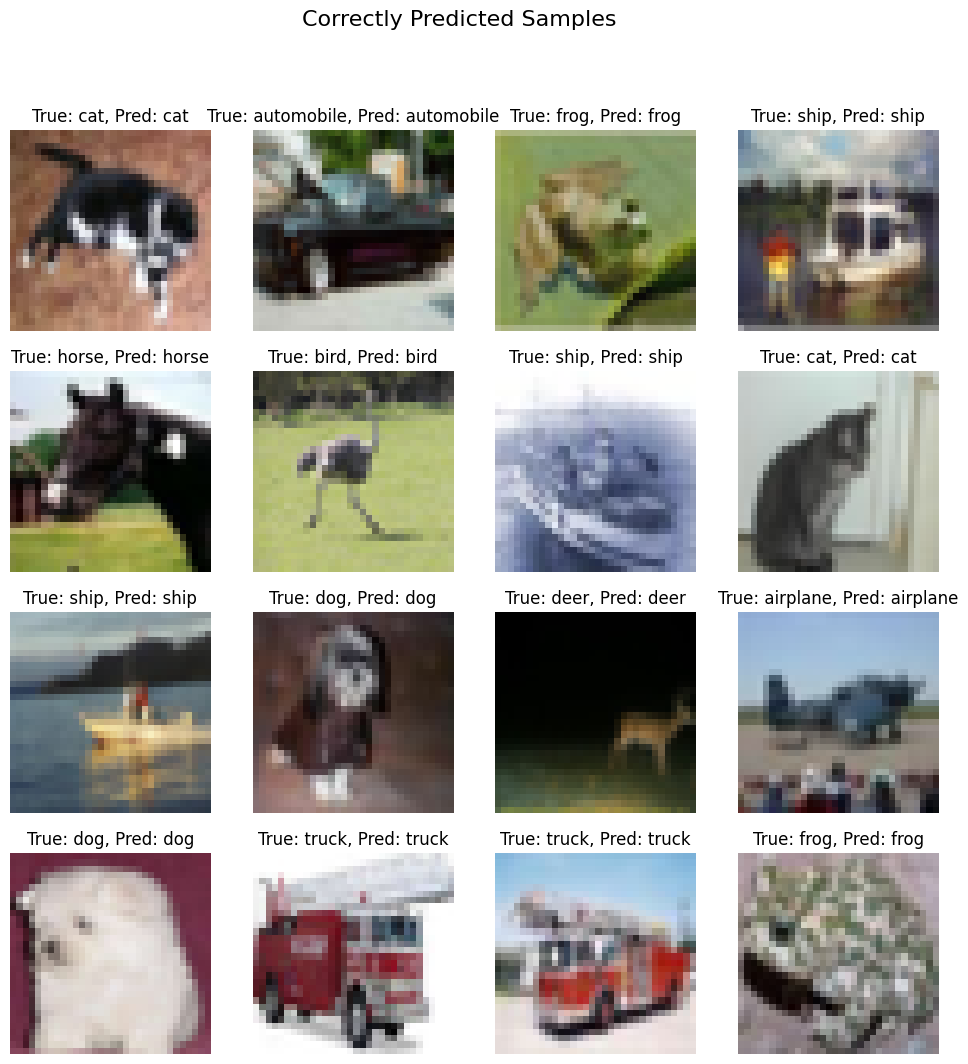

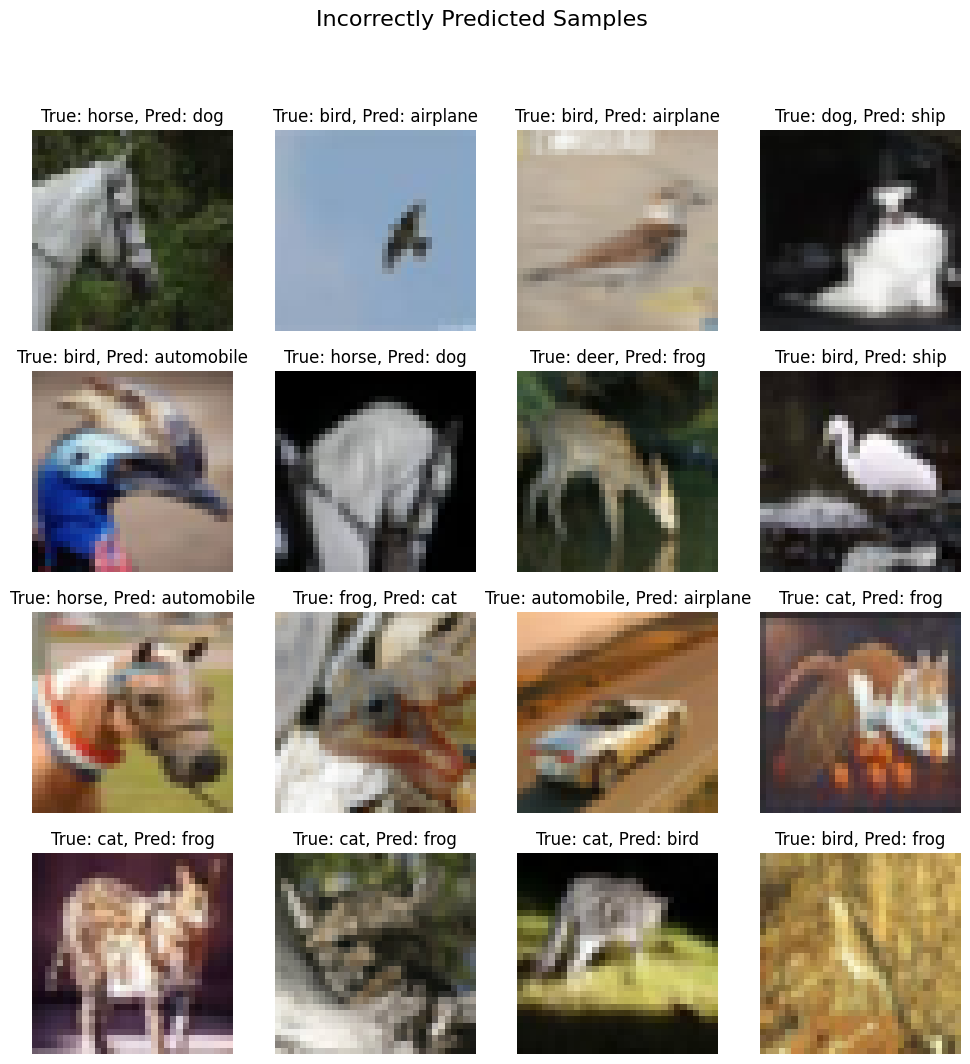

In [16]:
import torch
import matplotlib.pyplot as plt
import random

# Assuming model, test_loader, and class_names are already defined
model.eval()
correct_samples = []
incorrect_samples = []

# Evaluate the model and collect predictions
with torch.no_grad():
    for X, y in test_dataLoader:
        y_logit = model(X)
        y_pred = torch.argmax(y_logit, dim=1)
        for i in range(len(y)):
            if y_pred[i] == y[i]:
                correct_samples.append((X[i], y[i], y_pred[i]))
            else:
                incorrect_samples.append((X[i], y[i], y_pred[i]))

# Randomly select 16 samples from each category
correct_samples = random.sample(correct_samples, 16)
incorrect_samples = random.sample(incorrect_samples, 16)

# Function to plot samples
def plot_samples(samples, title):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle(title, fontsize=16)
    for i, (img, true_label, pred_label) in enumerate(samples):
        ax = axes[i // 4, i % 4]
        img = img.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        ax.imshow(img.cpu().numpy())
        ax.set_title(f'True: {class_names[true_label]}, Pred: {class_names[pred_label]}')
        ax.axis('off')
    plt.show()

# Plot correctly predicted samples
plot_samples(correct_samples, 'Correctly Predicted Samples')

# Plot incorrectly predicted samples
plot_samples(incorrect_samples, 'Incorrectly Predicted Samples')
